<a href="https://colab.research.google.com/github/AldataSci/EDAForAnime/blob/main/EDA(anime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intro: 
This is a dataset from Kaggle that was web-scraped from a website called myanimelist that shows various kinds of anime. The data shows The votes,the score,the name of the anime 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
## We can see that the favourites_count and popularity ranking doesn't matter since they all have the same values
Data = pd.read_csv("https://raw.githubusercontent.com/AldataSci/EDAForAnime/main/Votes_2022_12_22.csv")
Data.head(10)

,Votes,Score,English_Name,Favourites_count,Popularity_ranking
0,754530,10,Death Note,3569314.0,2
1,751526,9,Death Note,3569314.0,2
2,587289,8,Death Note,3569314.0,2
3,278438,7,Death Note,3569314.0,2
4,92685,6,Death Note,3569314.0,2
5,37646,5,Death Note,3569314.0,2
6,14111,4,Death Note,3569314.0,2
7,5006,3,Death Note,3569314.0,2
8,3007,2,Death Note,3569314.0,2
9,5000,1,Death Note,3569314.0,2


##Data Cleaning

In [20]:
### There are 1000 rows and 5 columns
Data.shape

(1000, 5)

In [4]:
Data.describe()

,Votes,Score,Favourites_count,Popularity_ranking
count,1000.000000,1000.000000,2.200000e+02,1000.000000
mean,109431.217000,5.500000,5.500908e+05,50.950000
std,139666.351105,2.873719,1.086046e+06,29.606825
min,247.000000,1.000000,6.509000e+03,1.000000
25%,5514.750000,3.000000,2.313600e+04,25.750000
50%,41308.500000,5.500000,3.547600e+04,50.500000
75%,185085.000000,8.000000,1.851230e+05,75.250000
max,941168.000000,10.000000,3.569314e+06,108.000000


In [5]:
## It seems that there are 10 counts of the same anime 1000 rows/10 = 100 Animes in this dataset...
Data['English_Name'].value_counts()

Death Note                 10
Darling in the FranXX      10
Durarara!!                 10
Clannad                    10
Overlord                   10
                           ..
Sword Art Online II        10
Boku dake ga Inai Machi    10
Akame ga Kill!             10
Nanatsu no Taizai          10
Bungou Stray Dogs          10
Name: English_Name, Length: 100, dtype: int64

In [6]:
## Check For Missing Values: In the dataset
## Appears to be 780 Null Values in the favorite_counts
Data.isnull().sum()

Votes                   0
Score                   0
English_Name            0
Favourites_count      780
Popularity_ranking      0
dtype: int64

In [7]:
## Drop this columns since this is irrelevant
Data.drop(columns = ['Favourites_count'],inplace=True)


In [8]:
Data.head(5)

,Votes,Score,English_Name,Popularity_ranking
0,754530,10,Death Note,2
1,751526,9,Death Note,2
2,587289,8,Death Note,2
3,278438,7,Death Note,2
4,92685,6,Death Note,2


##Basic Descriptive Statistics and Visualization

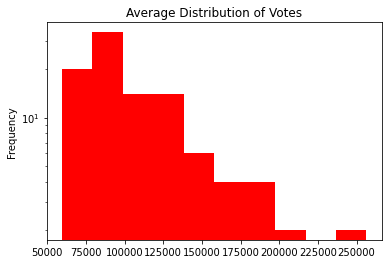

In [87]:
### Looking at the average distribution of Votes per Anime
## Performing a log-scale we can see that it is left tail skewed 
Data.groupby('English_Name')['Votes'].mean().plot(kind="hist",color="red")
plt.yscale("log")
plt.title("Average Distribution of Votes")
plt.show()

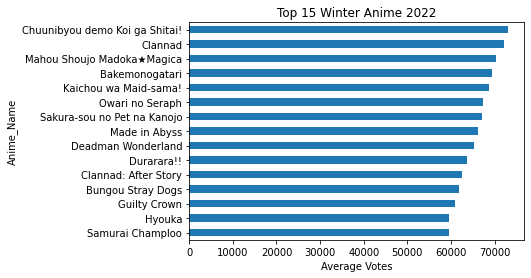

In [9]:
## Top 15 Popular Animes by votes
Data.groupby('English_Name')['Votes'].mean().sort_values(ascending=True).head(15).plot(kind="barh")
plt.xlabel("Average Votes")
plt.ylabel("Anime_Name")
plt.title("Top 15 Winter Anime 2022")
plt.show()

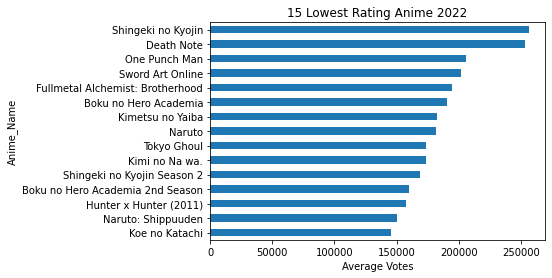

In [10]:
## The lowest rated anime is Koe no Katachi followed by Naruto and HxH, 
Data.groupby('English_Name')['Votes'].mean().sort_values(ascending=True).tail(15).plot(kind="barh")
plt.xlabel("Average Votes")
plt.ylabel("Anime_Name")
plt.title("15 Lowest Rating Anime 2022")
plt.show()

In [11]:
##Find The top ten highly rated Animes... 
Data.sort_values(by='Popularity_ranking')['English_Name'].unique()[1:11]

array(['Death Note', 'Fullmetal Alchemist: Brotherhood', 'One Punch Man',
       'Sword Art Online', 'Boku no Hero Academia', 'Kimetsu no Yaiba',
       'Naruto', 'Tokyo Ghoul', 'Hunter x Hunter (2011)',
       'Kimi no Na wa.'], dtype=object)

In [43]:
## What if we the found the Range of votes from max to min.. 
Dataa = Data.groupby("English_Name")['Votes'].agg({'min','max'})
Dataa = Dataa.reset_index()


In [69]:
## Find the Numerical Span of the Data by finding the range,then we sort the values..
Dataa['Range'] = Dataa['max'] - Dataa['min']

Dataa = Dataa.sort_values(by='Range',ascending=False)
Dataa

,English_Name,min,max,Range
35,Fullmetal Alchemist: Brotherhood,2415,941168,938753
25,Death Note,3007,754530,751523
81,Shingeki no Kyojin,3502,738126,734624
52,Kimi no Na wa.,1862,687879,686017
43,Hunter x Hunter (2011),1534,668424,666890
...,...,...,...,...
24,Deadman Wonderland,2643,189285,186642
44,Hyouka,1217,187486,186269
77,Samurai Champloo,465,183717,183252
18,Clannad,3388,185450,182062


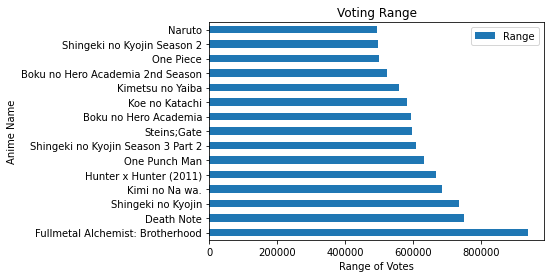

In [63]:
## Plotting the Voting Range of the Data we can see that FullMetal Alchemist has the varablitiy in votes,followed y Death Note and Shingeki no Kyojin, this may suggest that these animes were 
## popular or controversial to some viewers.. 
Dataa.head(15).plot(x="English_Name",y="Range",kind="barh")
plt.title("Voting Range")
plt.ylabel("Anime Name")
plt.xlabel("Range of Votes")
plt.show()

##Findings (So Far)

From what I have gleamed so far.. this dataset has 1000 rows and 5 columns, 2 of the columns are useless for analysis.So I have to use the Votes Column to calculate some statistics.., The highest average Anime for the Winter of 2022 was Chinnuboyu,Clannad and Mahou Shoujo. The lowest were Koe,Naruto and HxH.. Looking at the Range of the data we see that Death Note, Shingeki and FullMetal had the most variablity in Votes,this tells me that users found these anime were controversial to users as it had the most variance in votes.. The spread of the votes were left-tail skewed and average votes were between 75k and 100k. 